In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import sys
import matplotlib.pyplot as plt
import random
import math
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from sklearn.decomposition import PCA

In [ ]:
img = imread('/content/dummy2.png')
resized_img = cv2.resize(img, (256, 256)) 
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

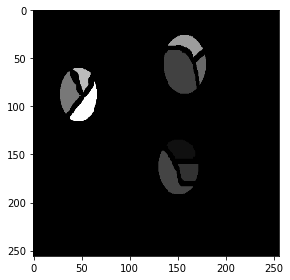

In [ ]:
imshow(gray)

In [ ]:
#thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
output = cv2.connectedComponentsWithStats(gray, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


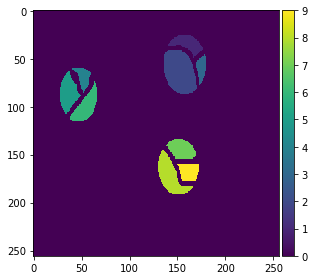

In [ ]:
print(np.unique(labels))
imshow(labels)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


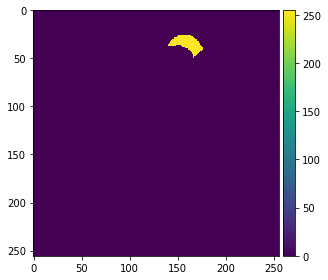

In [ ]:
	# construct a mask for the current connected component by
	# finding a pixels in the labels array that have the current
	# connected component ID

componentMasks = np.zeros((numLabels +3, 256, 256))
#contours = cv2.findContours(labels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in range(stats.shape[0]):
    componentMasks[cntr,:,:] = (labels == cntr).astype("uint8") * 255
    
imshow(componentMasks[1,:,:])
	  

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


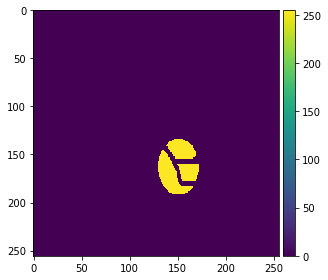

In [ ]:
#adding complete elements

componentMasks[10,:,:] = (labels == 1).astype("uint8") * 255 + (labels == 2).astype("uint8") * 255 + (labels == 3).astype("uint8") * 255
componentMasks[11,:,:] = (labels == 4).astype("uint8") * 255 + (labels == 5).astype("uint8") * 255 + (labels == 6).astype("uint8") * 255
componentMasks[12,:,:] = (labels == 7).astype("uint8") * 255 + (labels == 8).astype("uint8") * 255 + (labels == 9).astype("uint8") * 255

imshow(componentMasks[12,:,:])


In [ ]:
#ret,thresh = cv2.threshold(componentMasks[1],127,255,0)
componentMasks_centered = np.zeros((numLabels+3 , 256, 256)) 
for k in range(numLabels):
  ret,thresh = cv2.threshold(componentMasks[k],127,255,0)
  thresh = thresh.astype(np.uint8)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  for i in range(0, len(contours)):
       #if (i % 2 == 0):
       cnt = contours[i]
       #mask = np.zeros(im2.shape,np.uint8)
       #cv2.drawContours(mask,[cnt],0,255,-1)
       x,y,w,h = cv2.boundingRect(cnt)
       #cv2.rectangle(thresh,(x,y),(x+w,y+h),(255,255,0),2)
       componentMasks_centered[k,128 - h//2:128 - h//2 + h,128 - w//2:128 - w//2 + w] = componentMasks[k, y:y+h, x:x+w]
       #imshow(componentMasks_centered[k])
       #imshow(thresh)


In [ ]:
for k in range(10,13):
  ret,thresh = cv2.threshold(componentMasks[k],127,255,0)
  thresh = thresh.astype(np.uint8)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  x_min = 256
  x_max = 0
  y_min = 256
  y_max = 0
  for i in range(0, len(contours)):
        #if (i % 2 == 0):
        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)
        if (x_min > x):
          x_min = x
        if (y_min > y):
          y_min = y
        if (x_max < x + w):
          x_max = x + w
        if (y_max < y + h):
          y_max = y + h
        w = x_max - x_min
        h = y_max - y_min
        #cv2.rectangle(thresh,(x,y),(x+w,y+h),(255,255,0),2)
        componentMasks_centered[k,128 - h//2:128 - h//2 + h,128 - w//2:128 - w//2 + w] = componentMasks[k, y_min:y_max, x_min:x_max]


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


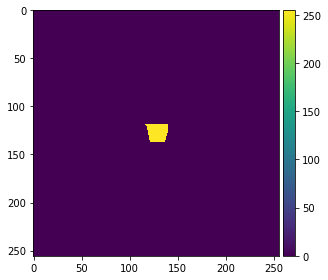

In [ ]:
imshow(componentMasks_centered[9,:,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


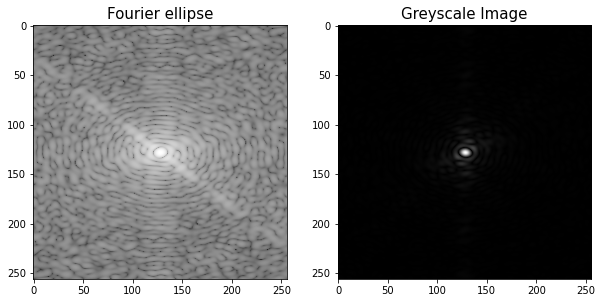

In [ ]:
mask= np.zeros((componentMasks_centered.shape[0], 256,256), dtype=complex)
fourier_mag= np.zeros((componentMasks_centered.shape[0], 256,256), dtype=float)
f_size = 15

for ctr in range(componentMasks_centered.shape[0]):
  #for k in range(3):
  #mask[i,:,:,k] = fourier_mask(ellipse_image[:,:,k], i)
  mask[ctr,:,:] = np.fft.fftshift(np.fft.fft2((componentMasks_centered[ctr,:,:])))
  for i in range(256):
    for j in range(256):
      fourier_mag[ctr,i,j] = np.sqrt(np.square(mask[ctr,i,j].real) + np.square(mask[ctr,i,j].imag))
      if (np.isinf(fourier_mag[ctr,i,j])):
        print('hi')
        fourier_mag[ctr,i,j] = 0
fourier_mag[np.isinf(fourier_mag)] = 0

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.log(abs(mask[componentMasks_centered.shape[0] -2,:,:])), cmap='gray')
ax[0].set_title('Fourier ellipse', fontsize = f_size)

#fourier_mag[:,:,:] = np.log(abs(fourier_mag[:,:,:]))
ax[1].imshow(((fourier_mag[componentMasks_centered.shape[0] -1,:,:])), cmap = 'gray')
ax[1].set_title('Greyscale Image', fontsize = f_size);

In [ ]:
np.max(fourier_mag[:][:][:])

15235230.0

In [ ]:
#quantizing 16 levels
no_of_ellipses = componentMasks_centered.shape[0]
quant = 4
range_gap = fourier_mag.shape[1]//quant

a_nm = np.zeros((no_of_ellipses,quant * quant,4096))


for k in range(no_of_ellipses):
  ctr1 = 0
  p = 0
  for i in range(quant):
    ctr2 = 0
    for j in range(quant):
      a_nm[k][p][:] = fourier_mag[k,ctr1:ctr1+range_gap,ctr2:ctr2+range_gap].flatten()
      p = p+1
      #print(ctr1,ctr1+range_gap,ctr2, ctr2+range_gap)
      ctr2 = ctr2 + range_gap
      

    ctr1 = ctr1 + range_gap
    #print(ctr1)




In [ ]:
#a_nm = np.zeros((no_of_ellipses,quant * quant,4096))

energy_nm = np.zeros((no_of_ellipses,quant * quant))
sum_nm = np.zeros((no_of_ellipses,quant * quant))

for i in range(no_of_ellipses):
  for quad in range(quant * quant):
    for j in range(4096):
      sum_nm[i,quad] = sum_nm[i,quad] + a_nm[i,quad,j] ** 2
      if (math.isinf(a_nm[i,quad,j] ** 2)):
        print(a_nm[i,quad,j],i,quad,j)
    energy_nm[i,quad] = np.sqrt(sum_nm[i,quad])

In [ ]:
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)

def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)

In [ ]:
dunn(energy_nm)

1.768049676268207e-07

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 12 nearest neighbors...
[t-SNE] Indexed 13 samples in 0.000s...
[t-SNE] Computed neighbors for 13 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 13 / 13
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.960976
[t-SNE] KL divergence after 1000 iterations: 0.306889


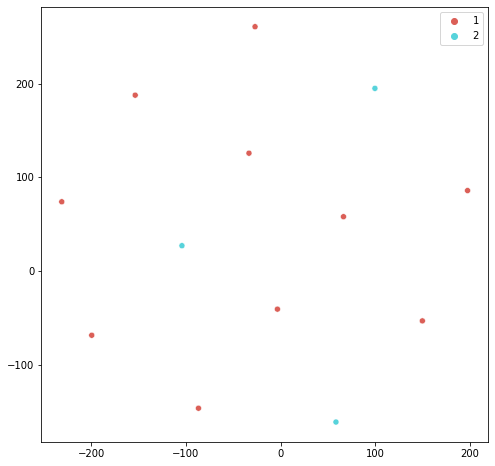

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE


labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]
tsne = TSNE(n_components=2, verbose=1, random_state=1)
tsne_results = tsne.fit_transform(energy_nm) 

plt.figure(figsize=(8,8))
'''
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    legend="full",
    alpha=0.3
)
'''

sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 2),
    legend="full",
    alpha=1
)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


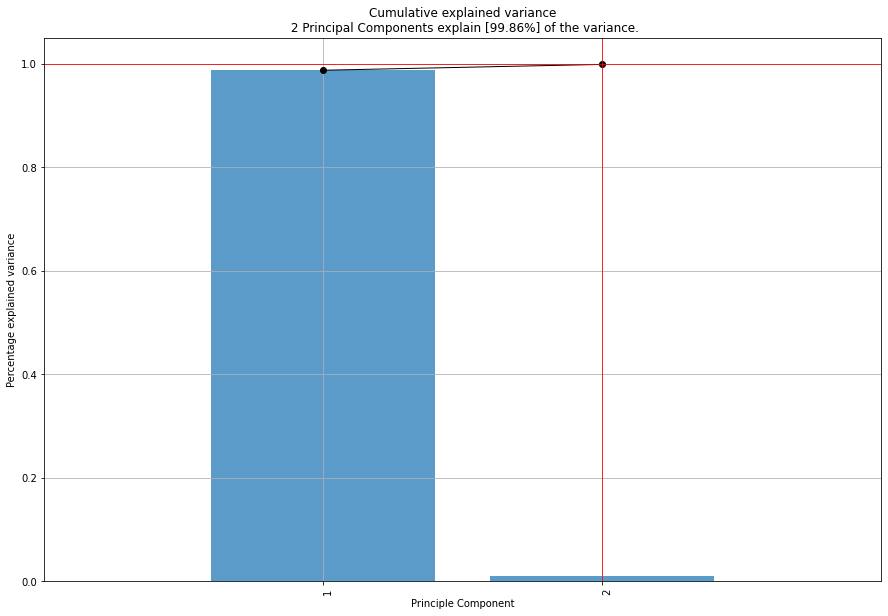

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

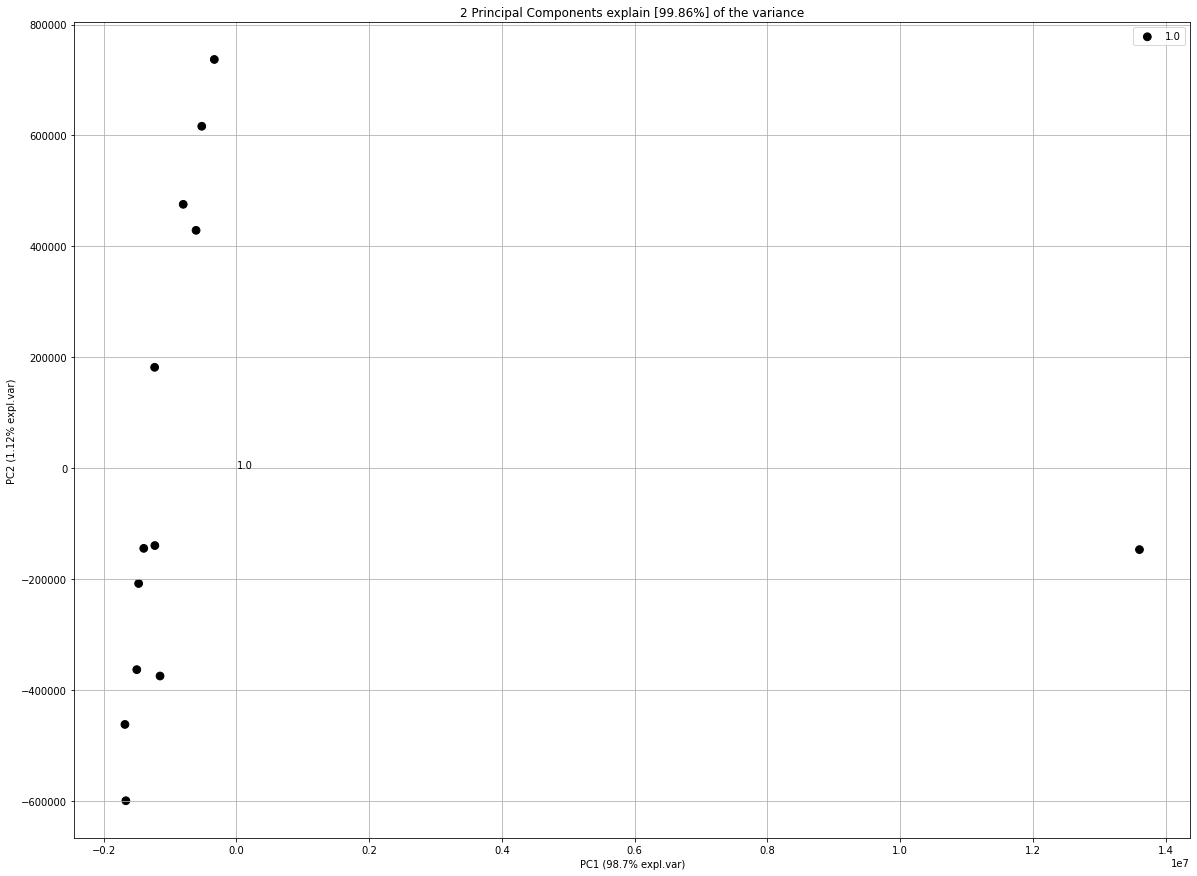

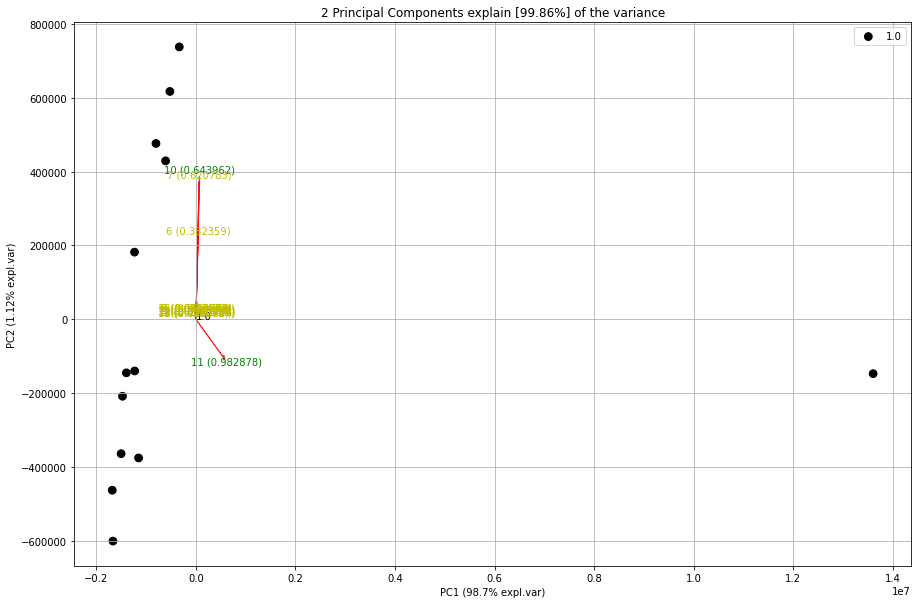

In [ ]:
#!pip install pca

from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(energy_nm)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=16)

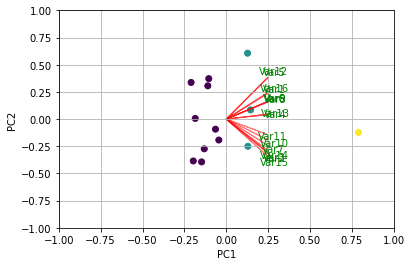

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(energy_nm)
energy_nm=scaler.transform(energy_nm)    
pca = PCA()
x_new = pca.fit_transform(energy_nm)
y = [3,1,1,1,1,1,1,1,1,1,2,2,2]

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()